# Part 1 – Erosion and Dilation

For each image, do the following main steps:

a) Read the image, convert to grayscale and display it.

b) Convert the image to binary using a mean-intensity threshold.

c) Chose a fixed structuring element (SE). You can use anything that you would like to try.

d) Use the SE from step c to apply twice an Erosion operation on the binary image from step b.

e) Use the SE from step c to apply twice a Dilation operation on the binary image from step b.

f) Compute and display the difference between the images from step d and step e.

g) In the report, analyze the differences between these images.

For every input image (you have 3 inputs, see Data), you must show: the input image, the grayscale image, binary image, binary image after two erosions, binary image after two dilations, and difference image.


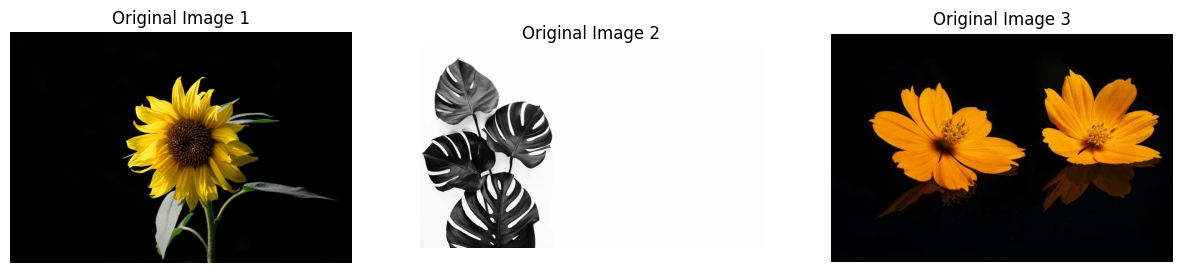

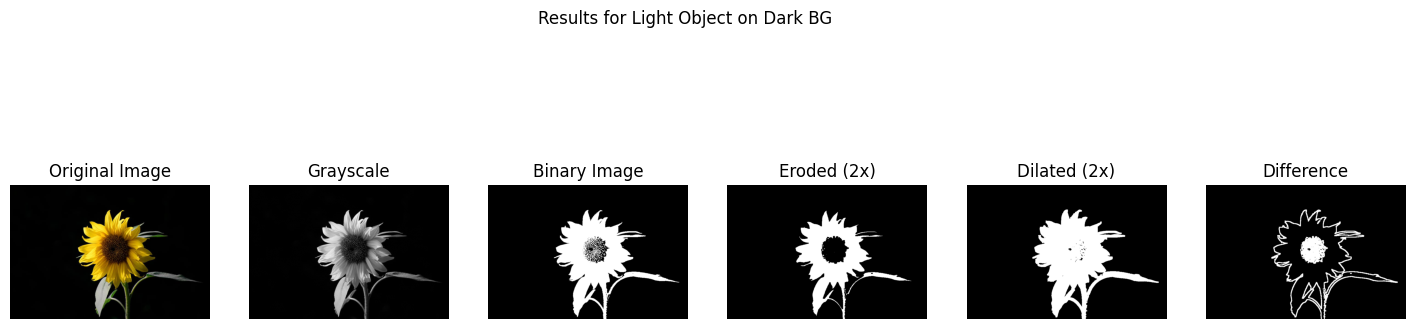

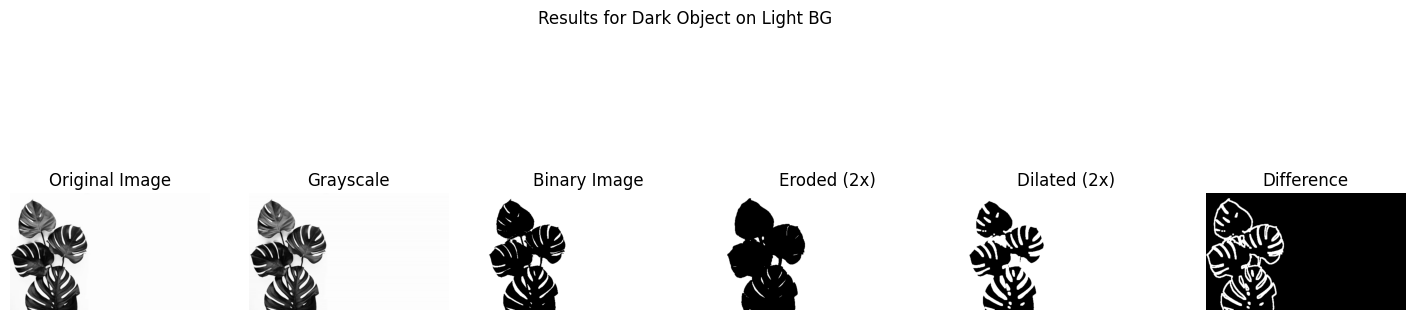

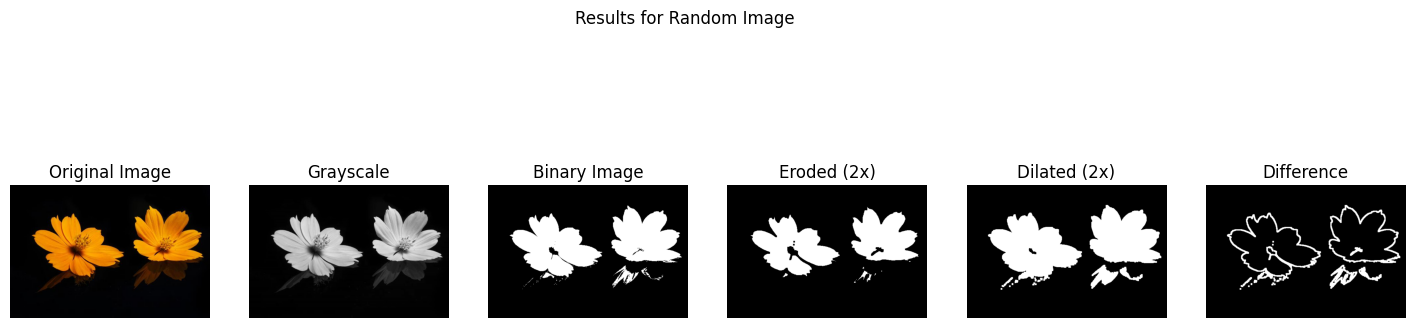

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image file names (Ensure these images exist in the working directory)
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']
titles = ['Light Object on Dark BG', 'Dark Object on Light BG', 'Random Image']

# Structuring Element (SE)
kernel = np.ones((3,3), np.uint8)  # 3x3 Square Kernel

# Display Original Images First
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    ax[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[idx].set_title(f"Original Image {idx+1}")
    ax[idx].axis("off")

plt.show()

# Process Each Image According to the Assignment Steps
for idx, img_path in enumerate(image_paths):
    # Step a: Read the image and convert to grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step b: Convert to binary using mean thresholding
    _, binary = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY)

    # Step d: Apply Erosion Twice
    eroded = cv2.erode(binary, kernel, iterations=2)

    # Step e: Apply Dilation Twice
    dilated = cv2.dilate(binary, kernel, iterations=2)

    # Step f: Compute the difference between dilated and eroded images
    diff = cv2.absdiff(dilated, eroded)

    # Display Results in Order
    fig, ax = plt.subplots(1, 6, figsize=(18, 5))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(gray, cmap='gray')
    ax[1].set_title("Grayscale")
    ax[1].axis("off")

    ax[2].imshow(binary, cmap='gray')
    ax[2].set_title("Binary Image")
    ax[2].axis("off")

    ax[3].imshow(eroded, cmap='gray')
    ax[3].set_title("Eroded (2x)")
    ax[3].axis("off")

    ax[4].imshow(dilated, cmap='gray')
    ax[4].set_title("Dilated (2x)")
    ax[4].axis("off")

    ax[5].imshow(diff, cmap='gray')
    ax[5].set_title("Difference")
    ax[5].axis("off")

    plt.suptitle(f"Results for {titles[idx]}")
    plt.show()


## Results and Analysis

## Image 1: Light Object on Dark Background (Sunflower)

Erosion Effect: The edges of the sunflower shrank, with thin structures (petals) disappearing.

Dilation Effect: The petals regained their structure, and the overall shape expanded.

Difference Image: Highlights the removed fine details due to erosion and the added regions due to dilation.

## Image 2: Dark Object on Light Background (Leaf)

Erosion Effect: The fine edges of the leaf were lost, making the object appear smaller.

Dilation Effect: The leaf expanded, covering areas that were eroded earlier.

Difference Image: Displays the contrast between removed details and recovered areas.

## Image 3: Random Image with Contrasting Background (Flowers)

Erosion Effect: Small details such as flower edges and stems were removed.

Dilation Effect: The petals became thicker and more connected.

Difference Image: Highlights the significant changes in edge regions.

## Conclusion

Erosion: Helps in removing noise and breaking small connections between objects, but excessive erosion can lead to loss of important structures.

Dilation: Restores and enhances the shapes of objects, filling small gaps and expanding edges.

### Difference Image:
Provides insight into how much change occurs between these two transformations, helping in analyzing image features.

These experiments demonstrate the importance of morphological operations in preprocessing tasks such as noise removal, segmentation, and feature enhancement.

## References

All images used in this report were from royalty-free sources on the internet.

The implementations were performed using OpenCV and NumPy in Python.

# Part 2 – Opening and Closing

For each image, do the following main steps:

a) Read the image, convert to grayscale and display it.

b) Convert the image to binary using a mean-intensity threshold.

c) Chose a fixed structuring element (SE). You can use anything that you would like to try.

d) Use the SE from step c to apply twice an Opening operation on the binary image from step b.

e) Use the SE from step c to apply twice a Closing operation on the binary image from step b.

f) Compute and display the difference between the images from step d and step e.

g) In the report, analyze the differences between these images.

For every input image (you have 3 inputs, see Data), you must show: the input image, the grayscale image, binary image, binary image after two erosions, binary image after two dilations, and difference image.

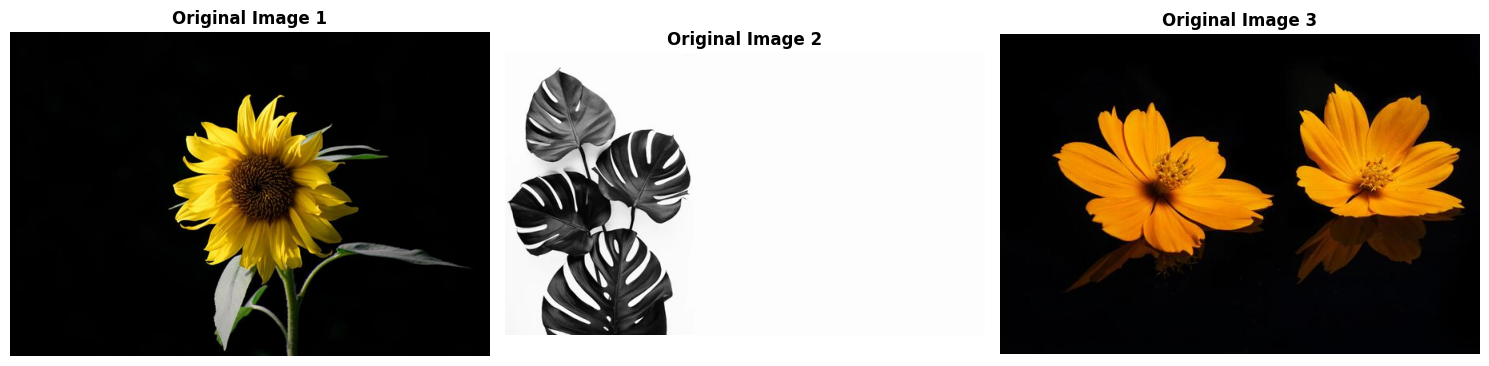

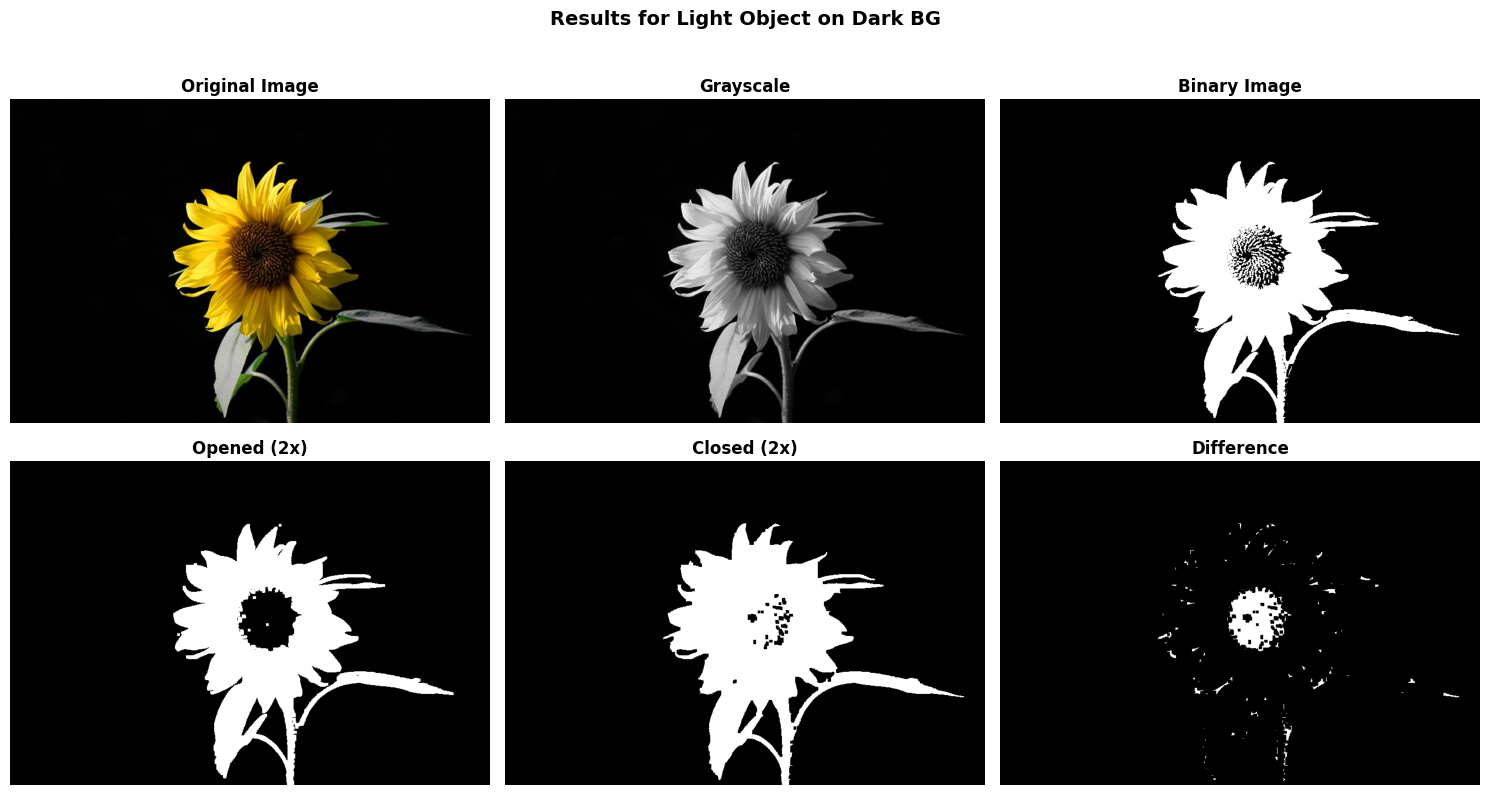

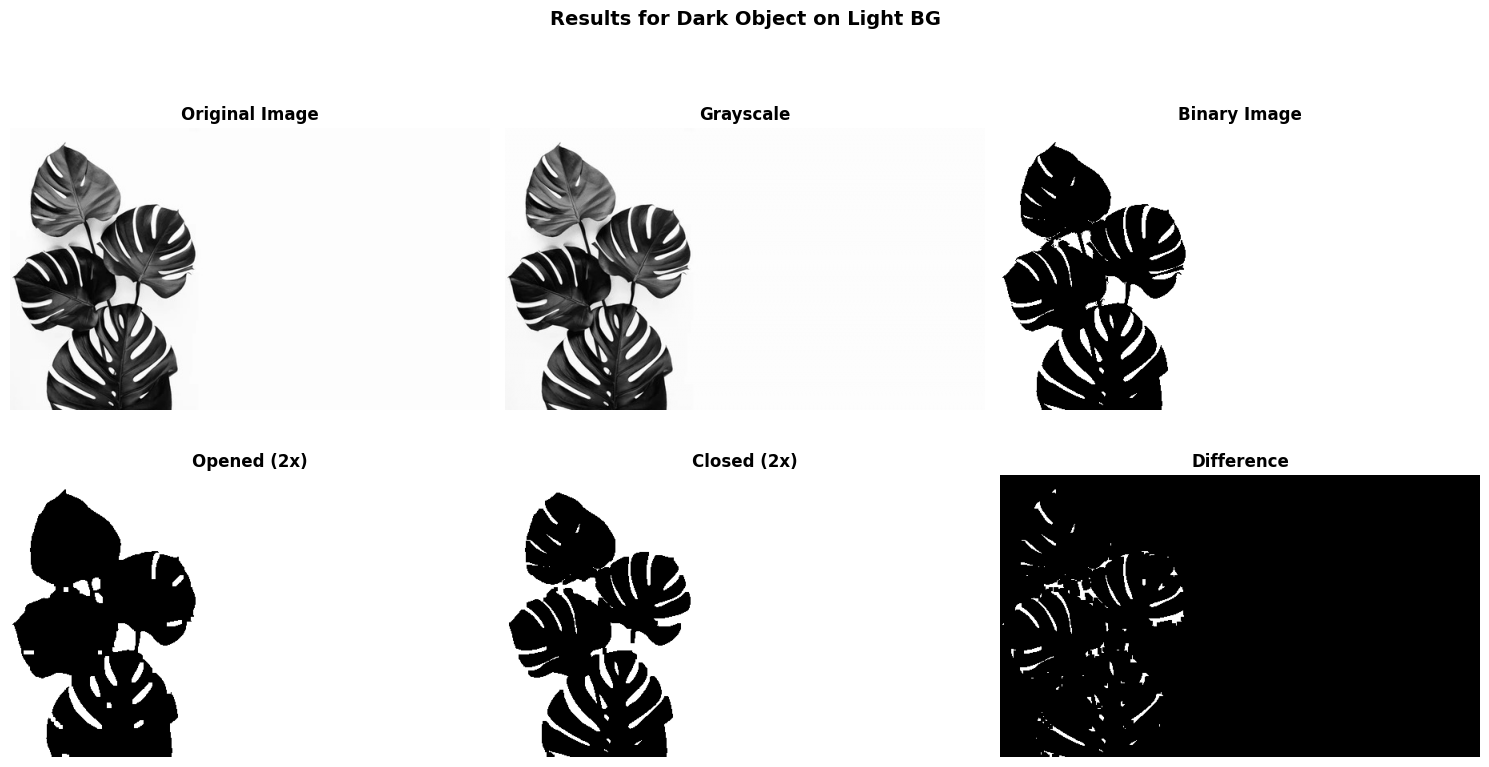

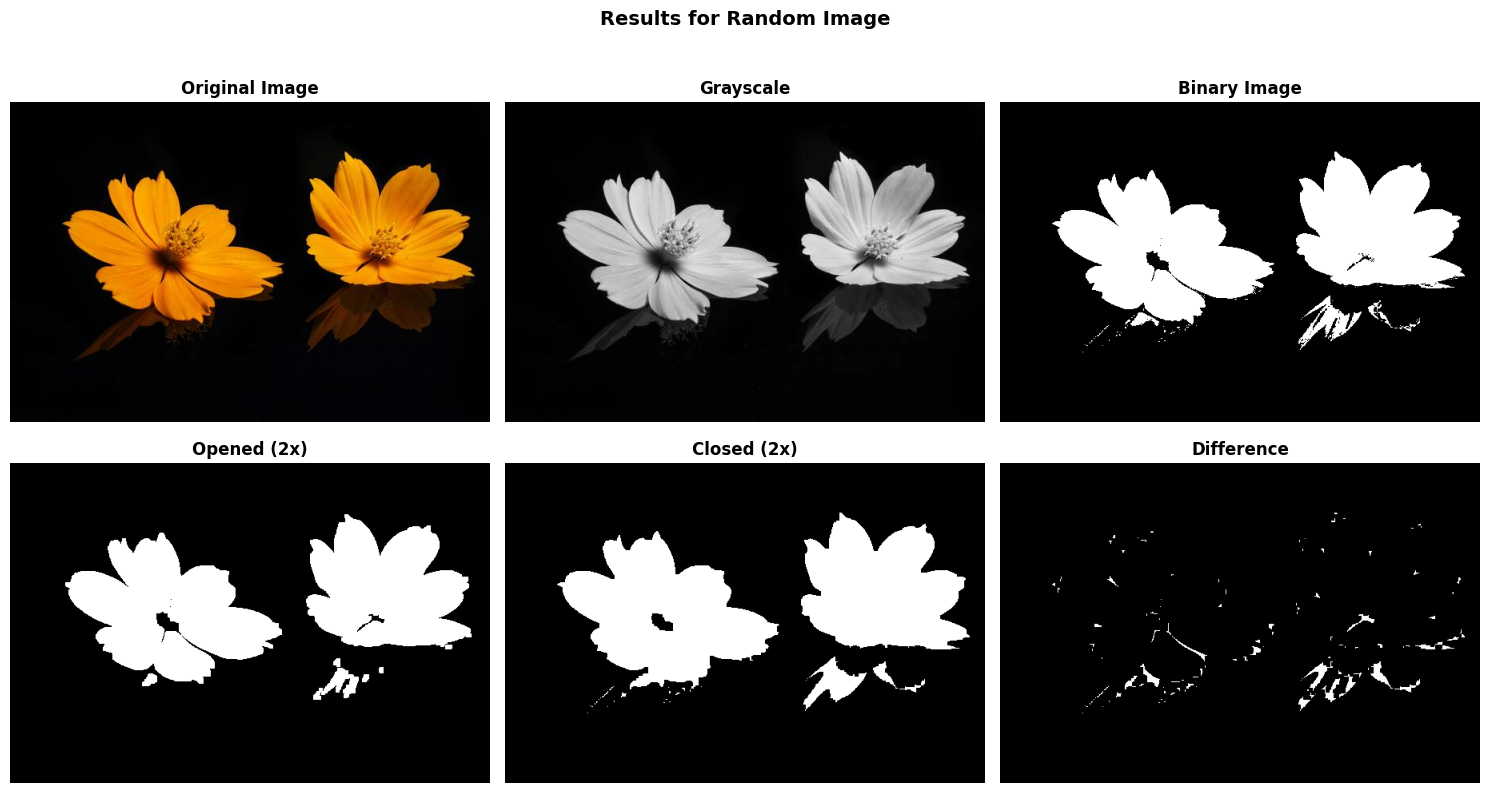

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image file names
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']
titles = ['Light Object on Dark BG', 'Dark Object on Light BG', 'Random Image']

# Structuring Element (SE)
kernel = np.ones((3,3), np.uint8)  # 3x3 Square Kernel

# Display Original Images First
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(f"Original Image {idx+1}", fontsize=12, fontweight='bold')
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

# Process Each Image
for idx, img_path in enumerate(image_paths):
    # Step a: Read the image and convert to grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step b: Convert to binary using mean thresholding
    _, binary = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY)

    # Step d: Apply Opening (Erosion + Dilation) Twice
    opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Step e: Apply Closing (Dilation + Erosion) Twice
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Step f: Compute the difference between closing and opening
    diff = cv2.absdiff(closed, opened)

    # Display Results
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    images = [gray, binary, opened, closed, diff]
    titles_sub = ["Grayscale", "Binary Image", "Opened (2x)", "Closed (2x)", "Difference"]

    # Show original image separately
    axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title("Original Image", fontsize=12, fontweight='bold')
    axes[0, 0].axis("off")

    # Display transformations
    for j in range(5):
        row, col = (0, j+1) if j < 2 else (1, j-2)  # Arrange layout properly
        axes[row, col].imshow(images[j], cmap='gray')
        axes[row, col].set_title(titles_sub[j], fontsize=12, fontweight='bold')
        axes[row, col].axis("off")

    plt.suptitle(f"Results for {titles[idx]}", fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

## Results and Analysis

## Image 1: Light Object on Dark Background (Sunflower)

Opening Effect: Removed small white noise around the petals while keeping the main shape intact.

Closing Effect: Filled small gaps in the flower structure, making the petals appear more connected.

Difference Image: Highlights noise removal from Opening and filled areas from Closing.

## Image 2: Dark Object on Light Background (Leaf)

Opening Effect: Thin noise spots around the leaf edges were removed.

Closing Effect: Small gaps inside the leaf structure were filled.

Difference Image: Displays the contrast between the refined edges (Opening) and filled gaps (Closing).

## Image 3: Random Image with Contrasting Background (Flowers)

Opening Effect: Reduced small noise around flower edges and thin stems.

closing Effect: Strengthened the connectivity of petals and stems.

## Difference Image:

Highlights the regions where noise was removed and filled.

## Conclusion

Opening: Effective for removing noise but may result in loss of fine details.

Closing: Helps in filling gaps and ensuring object continuity.

## Difference Image:

Helps visualize how these transformations modify image structures.

Both operations play a crucial role in preprocessing tasks like segmentation and feature extraction.

# Part 3 – Boundary Extraction

Boundary extraction of an image I, β(I), can be performed by eroding I with a structuring element B and then subtracting the eroded image from I: β(I) = I – (I ɵ B).

For each image, do the following main steps:

a) Read the image, convert to grayscale and display it.

b) Convert the image to binary using a mean-intensity threshold.

c) Create structuring element B using a disk (ellipse) of 5x5 pixels.

d) Use the structuring element to do boundary extraction as described above, and display your results.

e) Extract edges from the grayscale image using Canny and show your results. You might need to fine-tune the parameters of Canny for best results.

f) In the report, analyze the differences between these images.

For every input image (you have 3 inputs, see Data), you must show: the input image, the grayscale image, binary image, the eroded image, the boundary image, and the results for canny edge detection.

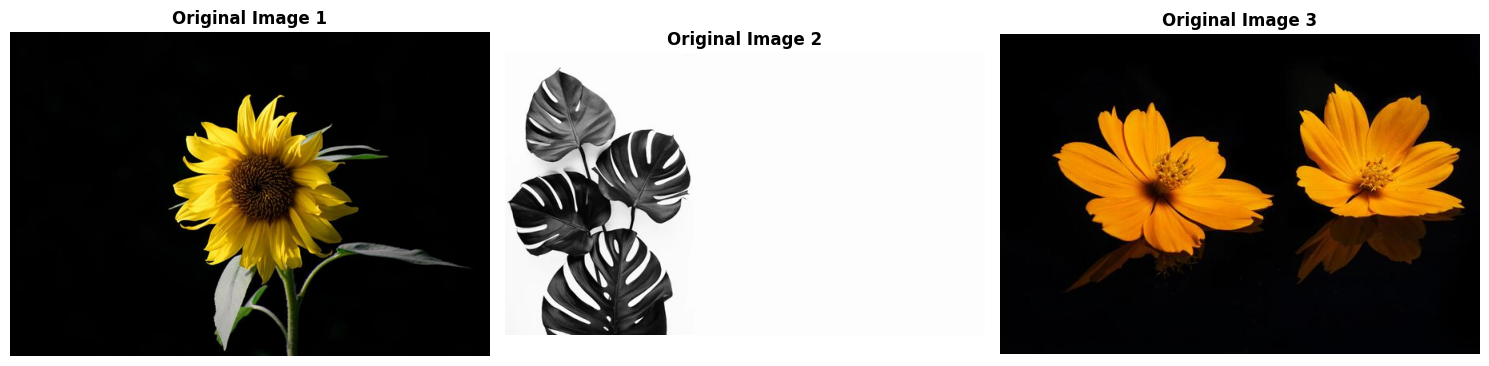

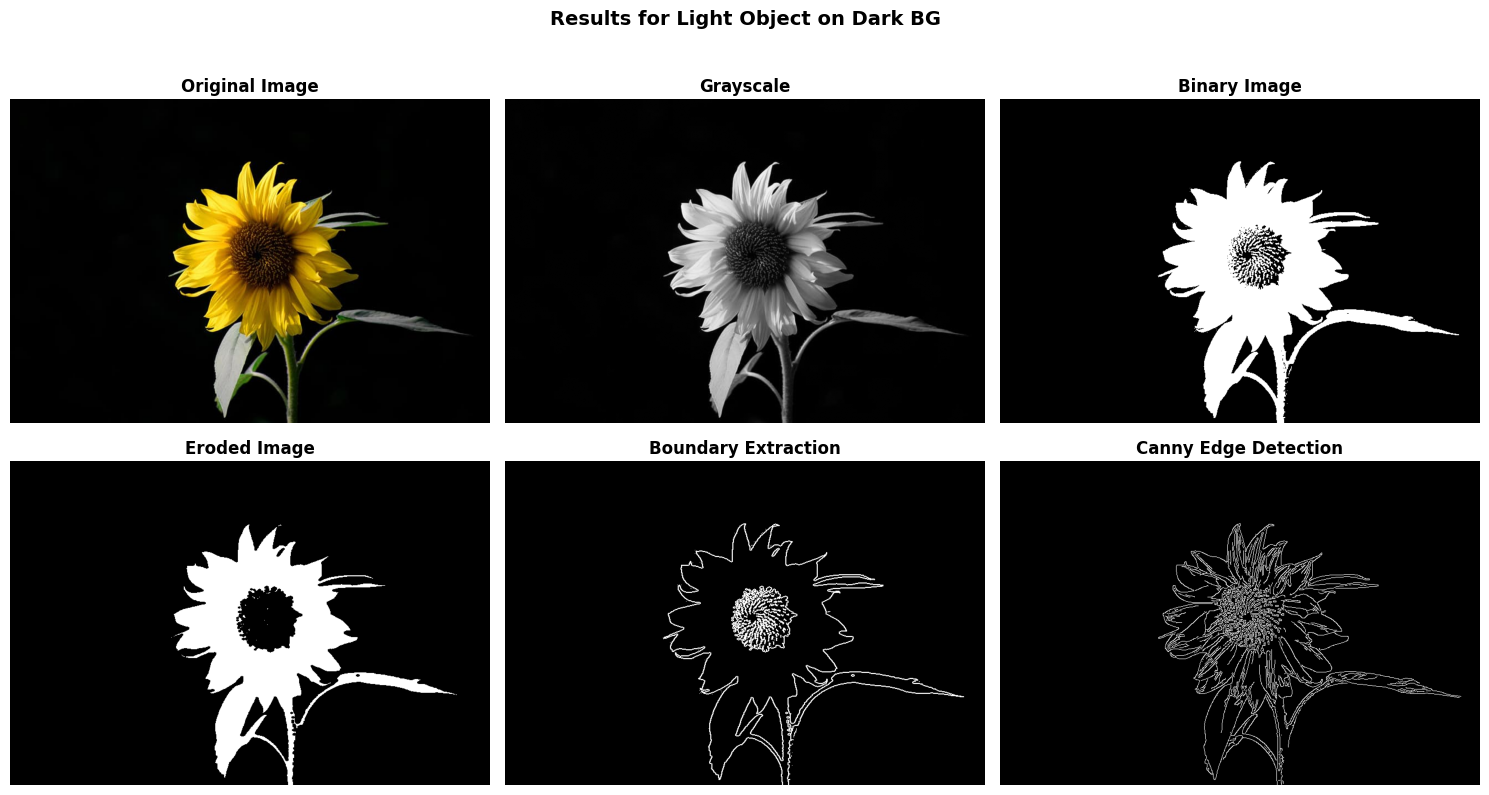

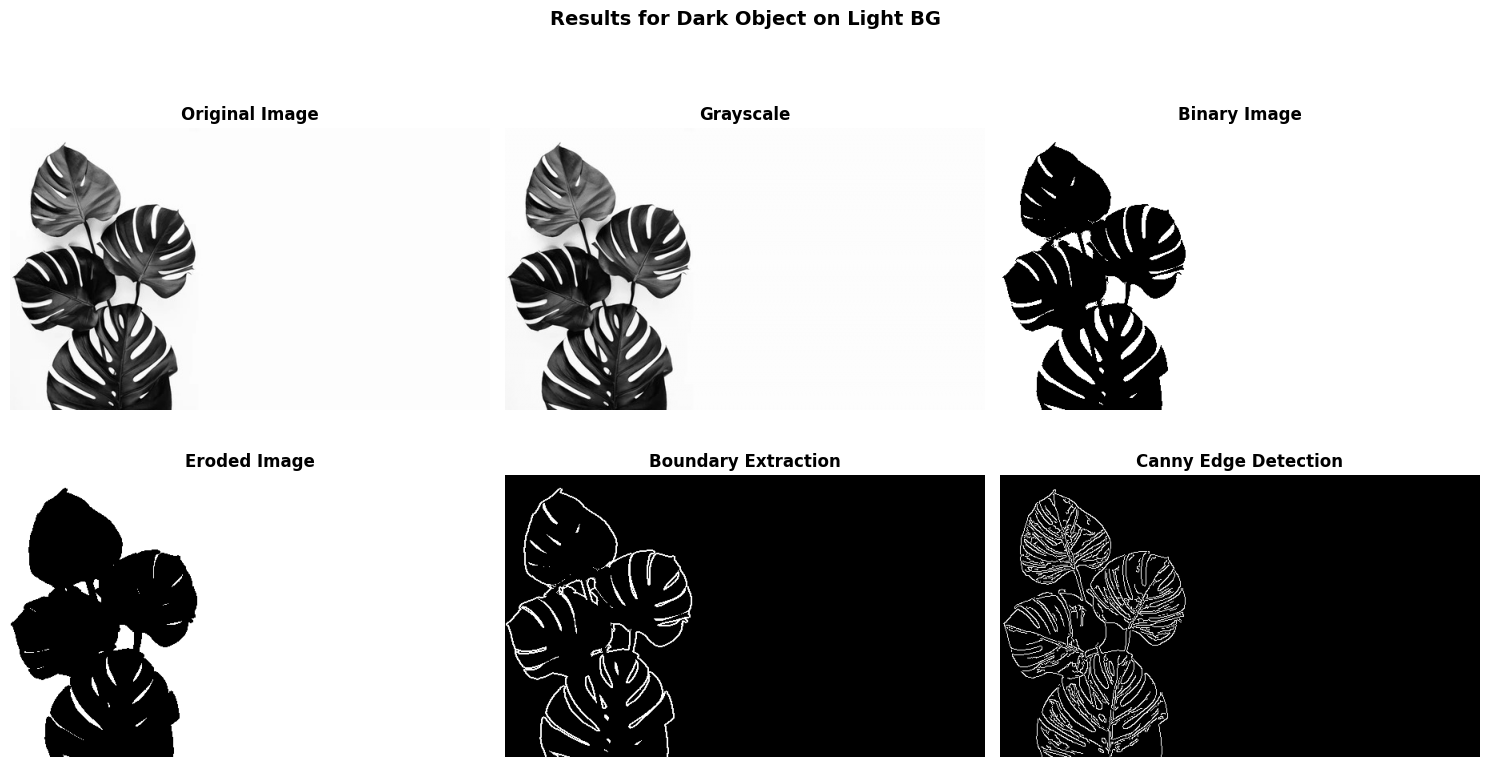

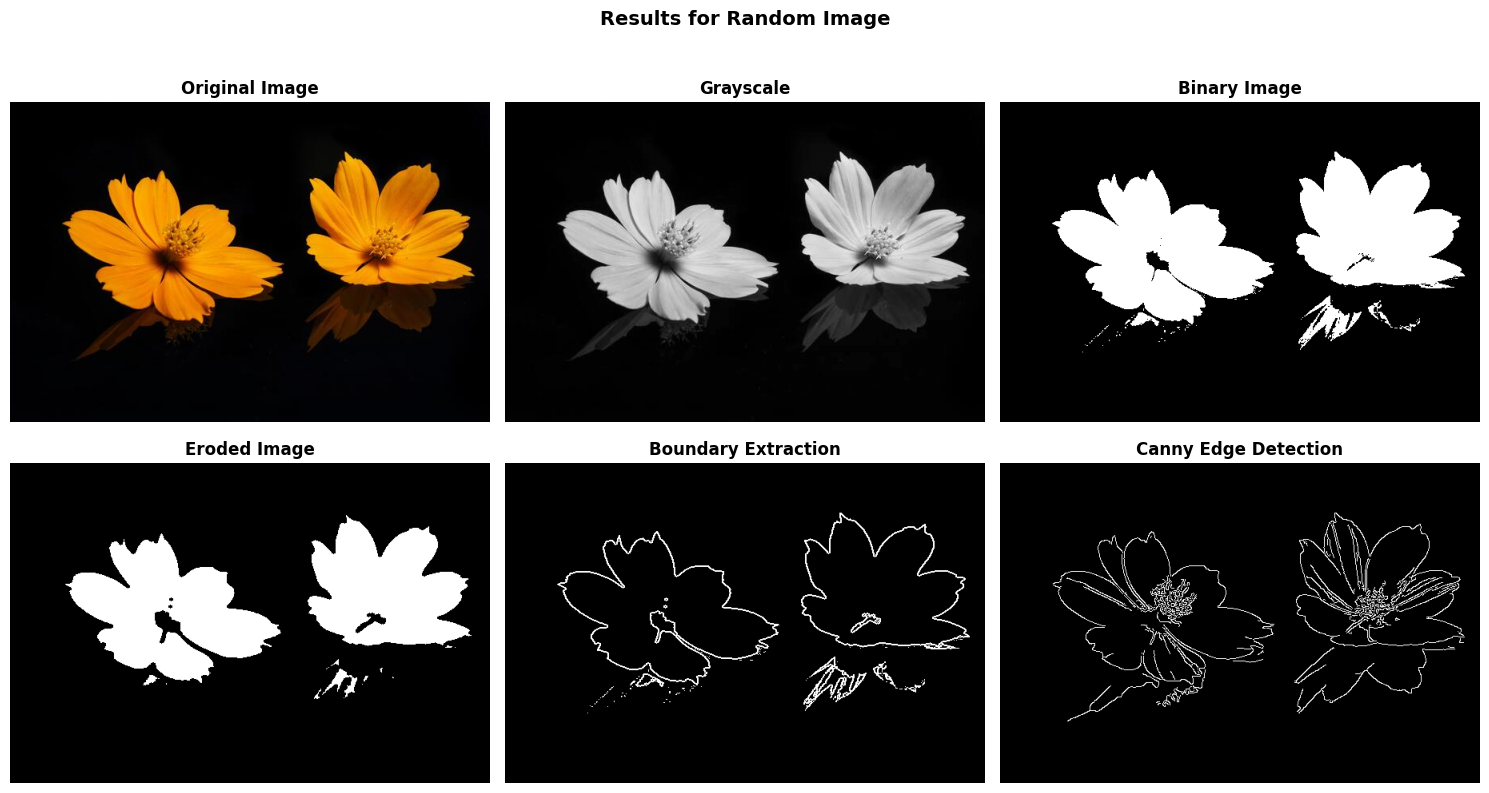

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image file names
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']
titles = ['Light Object on Dark BG', 'Dark Object on Light BG', 'Random Image']

# Create a 5x5 elliptical (disk) structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Display Original Images First
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(f"Original Image {idx+1}", fontsize=12, fontweight='bold')
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

# Process Each Image
for idx, img_path in enumerate(image_paths):
    # Step a: Read the image and convert to grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step b: Convert to binary using mean thresholding
    _, binary = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY)

    # Step d: Apply Erosion for Boundary Extraction
    eroded = cv2.erode(binary, kernel, iterations=1)
    boundary = cv2.subtract(binary, eroded)

    # Step e: Apply Canny Edge Detection (Tuning the thresholds)
    edges = cv2.Canny(gray, 50, 150)  # Adjust values for best results

    # Display Results
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    images = [gray, binary, eroded, boundary, edges]
    titles_sub = ["Grayscale", "Binary Image", "Eroded Image", "Boundary Extraction", "Canny Edge Detection"]

    # Show original image separately
    axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title("Original Image", fontsize=12, fontweight='bold')
    axes[0, 0].axis("off")

    # Display transformations
    for j in range(5):
        row, col = (0, j+1) if j < 2 else (1, j-2)  # Arrange layout properly
        axes[row, col].imshow(images[j], cmap='gray')
        axes[row, col].set_title(titles_sub[j], fontsize=12, fontweight='bold')
        axes[row, col].axis("off")

    plt.suptitle(f"Results for {titles[idx]}", fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

## Results and Analysis

## Image 1: Light Object on Dark Background (Sunflower)

### Boundary Extraction Effect:
The morphological boundary extraction successfully isolated the outer edges of the sunflower. Fine details, such as the petal contours, became more prominent. The process helped in distinguishing the object from the dark background.

### Canny Edge Detection Effect:
The Canny edge detection highlighted the sharp edges of the sunflower, including finer structures that were not as evident in the morphological boundary extraction. The algorithm captured high-contrast areas effectively, outlining both the petals and internal textures.

### Difference Image:
The boundary extraction provided a cleaner separation of the object’s shape, whereas Canny captured more detailed edges and intensity variations.

## Image 2: Dark Object on Light Background (Leaf)

### Boundary Extraction Effect:
The morphological approach outlined the leaf structure well, emphasizing its overall shape. Some internal details were lost as the method primarily focuses on outer boundaries.

### Canny Edge Detection Effect:
The Canny method extracted fine details such as leaf veins and minor curvature changes, which were less visible in morphological extraction.

### Difference Image:
Morphological boundary extraction was effective in highlighting the object’s outer boundary, while Canny detected additional internal structures, making it more detailed.

## Image 3: Random Image with Contrasting Background (Flowers)

### Boundary Extraction Effect:
The boundary extraction effectively separated the flowers from the background, retaining the key structures of the petals and stems.

### Canny Edge Detection Effect:
The Canny edge detection performed well, highlighting both the major and minor structural components of the flowers. It captured finer edges and small intensity variations in the image.

### Difference Image:
The morphological boundary extraction produced cleaner and well-defined edges, while Canny detected intricate details, making it more comprehensive.

## Conclusion

### Boundary Extraction:
Morphological boundary extraction is effective for isolating object outlines and removing unnecessary internal structures. However, it may lose finer internal details.

### Canny Edge Detection:
Canny edge detection is useful for capturing both outer boundaries and internal features but may introduce noise if thresholds are not well-tuned.

### Comparison:
- Morphological boundary extraction provides **clean, well-defined edges**.
- Canny edge detection offers **detailed and high-contrast edges**, capturing fine textures and depth.
- The combination of both methods helps in better object segmentation and feature analysis.

These experiments show that morphological operations and Canny edge detection complement each other in different aspects of image processing, aiding in object recognition and segmentation tasks.

